In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns













In [3]:
# Define column names for the dataset
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

# Load the dataset from a CSV file
df = pd.read_csv('adult.csv', header=None, names=col_names)

# Clean columns by removing extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


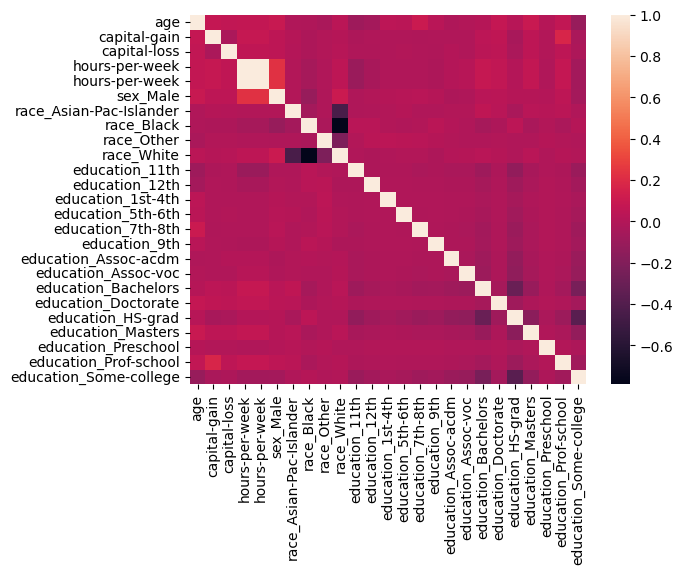

In [4]:
# 1. Check Class Imbalance
print(df.income.value_counts(normalize=True))

# 2. Create a feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)

# 3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())
plt.show()
plt.close()

# 4. Create the output variable y, which is binary (0 when income is <=50K, 1 when income is >50K)
y = np.where(df.income == '<=50K', 0, 1)

In [5]:
# 5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# 5b. Fit a Logistic Regression model with sklearn on the train set and make predictions on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [6]:

# 6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:')
print(log_reg.intercept_[0])
print('Model Parameters, Coeff:')
print(log_reg.coef_)


Model Parameters, Intercept:
-5.584092362542616
Model Parameters, Coeff:
[[ 3.66282815e-02  3.14812737e-04  6.66534485e-04  1.36723841e-02
   1.84197244e-02  1.03119406e+00  0.00000000e+00 -3.51731367e-01
   0.00000000e+00  8.25254248e-02 -5.75850386e-01  0.00000000e+00
   0.00000000e+00 -3.98894035e-01 -8.96191736e-01 -5.02380256e-01
   5.72042392e-01  5.46832659e-01  1.28241983e+00  1.80029372e+00
   0.00000000e+00  1.59980583e+00  0.00000000e+00  1.82323056e+00
   3.84602941e-01]]


In [7]:
# 7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on the test set:')
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy Score on the test set: {log_reg.score(x_test, y_test)}')

Confusion Matrix on the test set:
[[4776  250]
 [ 879  608]]
Accuracy Score on the test set: 0.826654383540611


In [8]:

# 8. Create a new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs() > 0].sort_values('coef')
print(coef_df)

                       var      coef
14       education_7th-8th -0.896192
10          education_11th -0.575850
15           education_9th -0.502380
13       education_5th-6th -0.398894
7               race_Black -0.351731
1             capital-gain  0.000315
2             capital-loss  0.000667
3           hours-per-week  0.013672
4           hours-per-week  0.018420
0                      age  0.036628
9               race_White  0.082525
24  education_Some-college  0.384603
17     education_Assoc-voc  0.546833
16    education_Assoc-acdm  0.572042
5                 sex_Male  1.031194
18     education_Bachelors  1.282420
21       education_Masters  1.599806
19     education_Doctorate  1.800294
23   education_Prof-school  1.823231


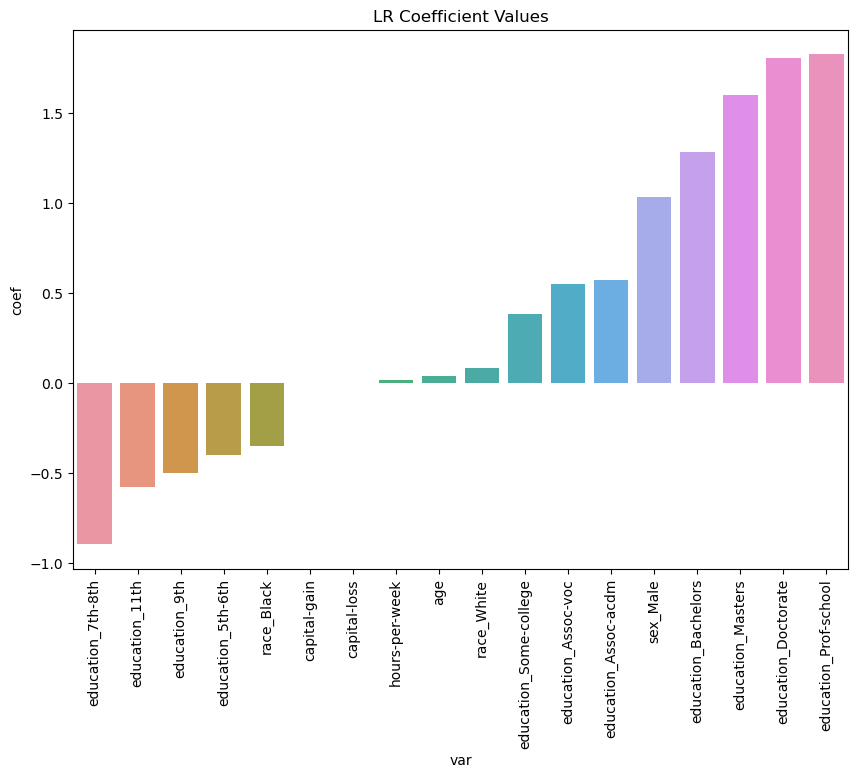

In [9]:
# 9. Create a barplot of the coefficients sorted in ascending order
plt.figure(figsize=(10, 7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90)
plt.title('LR Coefficient Values')
plt.show()
plt.close()

ROC AUC score: 0.8456308299733115


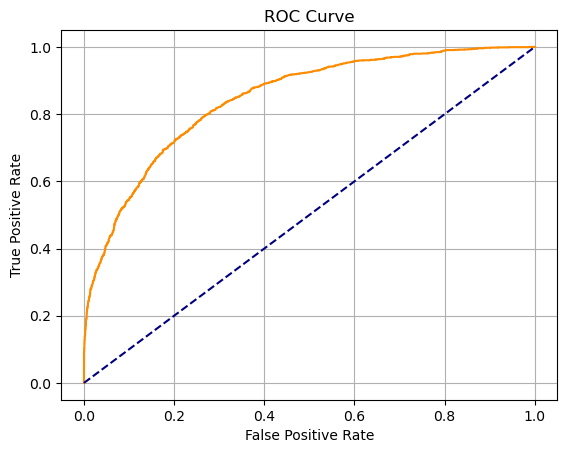

In [10]:


# 10. Plot the ROC curve and print the AUC value
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()